In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [51]:
df = pd.read_csv("phone.csv")

df.sample(5)


,Phone Name,Memory,Display,Camera,Battery,Processor,Warranty,Rating,Discount,Price
1777,"Infinix GT 30 Pro 5G+ (Blade White, 256 GB)",12 GB RAM | 256 GB ROM,17.22 cm (6.78 inch) Display,108MP + 8MP | 13MP Front Camera,5500 mAh Battery,Dimensity 8350 Ultimate Processor,1 Year Warranty for Handset and 6 Months Warra...,4.5,22,26999
1165,"Google Pixel 9 (Peony, 256 GB)",12 GB RAM | 256 GB ROM,16.0 cm (6.3 inch) Display,50MP + 48MP | 10.5MP Front Camera,4700 mAh Battery,Google Tensor G4 Processor,1 Year Domestic Warranty,4.6,6% off,"₹74,999"
196,"OnePlus Nord CE4 (Dark Chrome, 256 GB)",8 GB RAM | 256 GB ROM,17.02 cm (6.7 inch) Display,50MP Rear Camera,5500 mAh Battery,OxygenOS 14.0 Processor,Domestic Warranty 1 Year For Handset And 6 mon...,4.5,13% off,"₹23,278"
1566,"OnePlus 11 5G (Marble Odyssey, 256 GB)",16 GB RAM | 256 GB ROM,17.02 cm (6.7 inch) Display,50MP Rear Camera,5000 mAh Battery,1 Year Warranty For Phone and 6 Months Warrant...,Not Available,4.5,30,45499
1253,"OnePlus 12 (Glacial White, 256 GB)",12 GB RAM | 256 GB ROM,17.32 cm (6.82 inch) Full HD+ AMOLED Display,50MP Rear Camera,5400 mAh Battery,Qualcomm SM8650-AB Snapdragon 8 Gen 3 (4 nm) P...,1 Year manufacturer warranty for device and 1 ...,4.6,22% off,"₹50,444"


In [52]:
df.shape

(2040, 10)

In [53]:

# Overall info dekho
print(df.info())  # Columns, types, null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Phone Name  2040 non-null   object
 1   Memory      2040 non-null   object
 2   Display     2040 non-null   object
 3   Camera      2039 non-null   object
 4   Battery     2040 non-null   object
 5   Processor   2040 non-null   object
 6   Warranty    2039 non-null   object
 7   Rating      2040 non-null   object
 8   Discount    2040 non-null   object
 9   Price       2040 non-null   object
dtypes: object(10)
memory usage: 159.5+ KB
None


In [54]:
# Stats dekho
df.describe()  # Mean, min, max, std dev, etc

,Phone Name,Memory,Display,Camera,Battery,Processor,Warranty,Rating,Discount,Price
count,2040,2040,2040,2039,2040,2040,2039,2040,2040,2040
unique,1014,58,116,185,118,219,86,21,109,506
top,"Infinix GT 30 Pro 5G+ (Blade White, 256 GB)",12 GB RAM | 256 GB ROM,17.02 cm (6.7 inch) Full HD+ Display,50MP Rear Camera,5000 mAh Battery,1 year warranty for phone and 1 year warranty ...,Not Available,4.4,Not Available,"₹11,499"
freq,83,300,147,198,502,155,628,453,109,76


In [55]:
df.drop(['Warranty'], axis=1,inplace=True)

In [56]:
df = df.drop_duplicates().reset_index(drop=True)

df.shape


(1338, 9)

In [57]:
# Step 1: Extract brand name (first word from Phone Name)
brands = df['Phone Name'].str.split().str[0]

# Step 2: Insert new column at index 0
df.insert(1, 'Brand', brands)


In [58]:


# Empty lists to store results
phone_names = []
colors = []

for value in df['Phone Name']:
    # Match: Phone name (before first bracket), Color (inside first bracket)
    match = re.match(r'^(.*?)\s*\((.*?),\s*\d+\s*GB\)', value)
    
    if match:
        phone_name = match.group(1).strip()
        color = match.group(2).strip()
    else:
        # Fallback: If pattern fails
        phone_name = value
        color = "Not Available"
    
    phone_names.append(phone_name)
    colors.append(color)

# Insert color at index 1 and name at index 0 (replace if already exists)
df.insert(2, 'Color', colors)
df['Phone Name'] = phone_names  # Overwrite with clean names



In [59]:
# Create empty lists to store extracted RAM and ROM values
ram_list = []
rom_list = []

# Loop through each value in the 'Memory' column
for value in df['Memory']:
    # Extract RAM value using regex (e.g., '6 GB RAM' -> 6)
    ram_match = re.search(r'(\d+)\s*GB RAM', value)
    ram = ram_match.group(1) if ram_match else 'NA'
    ram_list.append(ram)
    
    # Extract ROM value using regex (e.g., '128 GB ROM' -> 128)
    rom_match = re.search(r'(\d+)\s*GB ROM', value)
    rom = rom_match.group(1) if rom_match else 'NA'
    rom_list.append(rom)

# Insert the extracted RAM and ROM values as new columns at index 2 and 3
df.insert(3, "RAM (GB)", ram_list)
df.insert(4, "ROM (GB)", rom_list)

# Delete the original 'Memory' column since it's now split into RAM and ROM
del df['Memory']


In [60]:
# Extract display type like Full HD+, HD+, etc.
display_types = []
for value in df['Display']:
    match = re.search(r'\)\s*(.*?)\s*Display', value)
    
    if match:
        disp_type = match.group(1).strip()
        if disp_type == "":
            display_types.append("Display")
        else:
            display_types.append(disp_type)
    else:
        display_types.append("Display")  # Default if nothing matched

df.insert(5, 'Display Type', display_types)

# Extract display size in inches
display_inches = []
for value in df['Display']:
    match = re.search(r'\((.*?) inch', value)
    if match:
        display_inches.append(match.group(1).strip())
    else:
        display_inches.append("NA")

df.insert(6, 'Display Size (inches)', display_inches)




del df['Display']

In [61]:
# Create an empty list to store extracted battery capacity values
battery_values = []

# Loop through each value in the 'Battery' column
for value in df['Battery']:
    # Use regex to extract 3 to 5 digit battery capacity followed by 'mAh'
    match = re.search(r'(\d{3,5})\s*mAh', value)
    if match:
        # If match found, add the numeric value to the list
        battery_values.append(match.group(1))
    else:
        # If no match found, append "NA"
        battery_values.append("NA")

# Insert the extracted battery values as a new column at index 6
df.insert(7, 'Battery (mAh)', battery_values)

# Delete the original 'Battery' column from the DataFrame
del df['Battery']


In [62]:
# New lists for camera
back_cameras = []
front_cameras = []

for cam in df['Camera']:
    if isinstance(cam, str):  # check if value is string
        if '|' in cam:
            back, front = cam.split('|', 1)
            back_cameras.append(back.strip())
            front_cameras.append(front.strip())
        elif 'Front Camera' in cam:
            back_cameras.append('Not Available now')
            front_cameras.append(cam.strip())
        elif 'Rear Camera' in cam:
            back_cameras.append(cam.strip())
            front_cameras.append('Not Available now')
        else:
            back_cameras.append('Not Available now')
            front_cameras.append('Not Available now')
    else:
        # If value is not string (i.e., float or NaN)
        back_cameras.append('Not Available now')
        front_cameras.append('Not Available now')

# Insert into DataFrame at index 7 and 8
df.insert(8, 'Back Camera', back_cameras)
df.insert(9, 'Front Camera', front_cameras)

del df['Camera']


In [63]:
# Remove '%' and 'off', strip spaces
df['Discount'] = df['Discount'].str.replace('%', '').str.replace('off', '').str.strip()


In [64]:
# Step 1: Remove ₹ and commas
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').str.strip()

# Step 2: Remove rows jisme price missing ya non-numeric ho
df = df[df['Price'].str.isnumeric()]

# Step 3: Convert to integer
df['Price'] = df['Price'].astype(int)

print(df['Price'].dtype)



int64


In [65]:
# Columns to convert
cols_to_convert = ['RAM (GB)', 'ROM (GB)', 
                   'Display Size (inches)', 'Battery (mAh)', 
                   'Rating', 'Discount', 'Price']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float (auto), invalid → NaN


In [66]:
# Keep only rows where 'Price' is greater than or equal to 5000
df = df[df['Price'] >= 5000]


df.shape

(1307, 14)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Phone Name             1307 non-null   object 
 1   Brand                  1307 non-null   object 
 2   Color                  1307 non-null   object 
 3   RAM (GB)               1149 non-null   float64
 4   ROM (GB)               1291 non-null   float64
 5   Display Type           1307 non-null   object 
 6   Display Size (inches)  1295 non-null   float64
 7   Battery (mAh)          1149 non-null   float64
 8   Back Camera            1307 non-null   object 
 9   Front Camera           1307 non-null   object 
 10  Processor              1307 non-null   object 
 11  Rating                 1298 non-null   float64
 12  Discount               1214 non-null   float64
 13  Price                  1307 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 153.2+ KB


# Which phone brands offer the best average rating?

In [68]:
brand_avg_rating = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False)
brand_avg_rating.head(6)

Brand
Apple      4.600649
IQOO       4.471429
vivo       4.456376
LG         4.450000
Nothing    4.430769
OPPO       4.430000
Name: Rating, dtype: float64


**🔍 Brand-wise average ratings:**

* **Apple** has the **highest average rating (4.60)**.
* **IQOO**, **vivo**, and **LG** also have **strong user ratings**.
* **OPPO** and **Nothing** follow closely with **good overall satisfaction**.

✅ So, **Apple** leads in user satisfaction, with others not far behind.


### Visualization

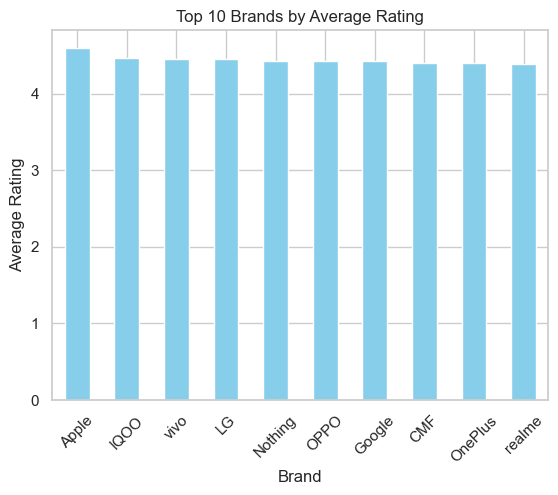

In [69]:
brand_avg_rating.head(10).plot(kind='bar',color='skyblue')
plt.title('Top 10 Brands by Average Rating')
plt.ylabel("Average Rating")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.show()

In [70]:
num_brands = df['Brand'].nunique()
print("Total unique brands:", num_brands)


Total unique brands: 28


# How does price relate to RAM, ROM, and battery size?

In [71]:
correlation = df[['Price','RAM (GB)', 'ROM (GB)','Battery (mAh)']].corr()
correlation

,Price,RAM (GB),ROM (GB),Battery (mAh)
Price,1.000000,0.186921,0.510493,-0.228505
RAM (GB),0.186921,1.000000,0.252102,0.023645
ROM (GB),0.510493,0.252102,1.000000,0.040620
Battery (mAh),-0.228505,0.023645,0.040620,1.000000




**📊 Price vs RAM, ROM, Battery:**

* **ROM** has the **strongest link** with price — more storage, higher cost.
* **RAM** has a **weak relation** with price.
* **Battery size** has **no clear impact** on price — in fact, slightly negative.

✅ So, **storage affects price the most**, not RAM or battery.


# Which display type is most common in budget vs premium phones?

In [72]:
# Step 1: Define budget and premium ranges (example values, adjust if needed)

budget_phone = df[df['Price'] <= 15000]
premium_phone = df[df['Price'] > 25000]

# Step 2: Count display types

budget_display_counts = budget_phone['Display Type'].value_counts()
premium_display_counts = premium_phone['Display Type'].value_counts()

# Step 3: Show results
print("📱 Budget Phones - Most Common Display Types:")
print(budget_display_counts.head())

print("\n💎 Premium Phones - Most Common Display Types:")
print(premium_display_counts.head(6))

📱 Budget Phones - Most Common Display Types:
Display Type
Full HD+    97
HD+         94
Display     68
Full HD      5
HD           3
Name: count, dtype: int64

💎 Premium Phones - Most Common Display Types:
Display Type
Full HD+            257
Display             255
Super Retina XDR    134
Quad HD+             35
Full HD+ AMOLED      35
Retina HD            14
Name: count, dtype: int64




**🎯 Display types – Budget vs Premium phones:**

* **Budget phones** mostly use **Full HD+** and **HD+** displays.
* **Premium phones** use **Full HD+**, **Super Retina XDR**, and **Quad HD+** for better visuals.
* **Advanced display tech** is more common in higher-priced phones.

✅ So, as price increases, **display quality clearly improves**.


# Which processor types are used in top-rated phones?

In [73]:
# Step 1: Define the rating threshold (e.g., top-rated means 4.5 or more)
top_rated = df[df['Rating'] >= 4.5]

# Step 2: Count processor types in top-rated phones
top_processors = top_rated['Processor'].value_counts()

# Step 3: Show result
top_processors.head()

Processor
1 year warranty for phone and 1 year warranty for in Box Accessories.    134
7 Gen 3 Processor                                                         24
Qualcomm Snapdragon 8 Gen 2 Processor                                     18
Google Tensor G4 Processor                                                16
Exynos 2400 Processor                                                     14
Name: count, dtype: int64


**🔍 Processors in top-rated phones:**

* **7 Gen 3** and **Snapdragon 8 Gen 2** are the most used in top-rated phones.
* **Google Tensor G4** and **Exynos 2400** also show strong user satisfaction.
* Overall, **Snapdragon and Tensor** chips are common in highly rated phones.

✅ So, **Snapdragon** and **Tensor** processors are linked with better ratings.


# Which display types are most popular with higher ratings?

In [74]:

#  Count Display types in top-rated phones
top_display_type = top_rated['Display Type'].value_counts()

top_display_type.head(6)

Display Type
Display                     145
Super Retina XDR            134
Full HD+                     99
Quad HD+                     30
Full HD+ AMOLED              25
Full HD+ E3 Super AMOLED     11
Name: count, dtype: int64



* **Super Retina XDR** and **Full HD+** displays are most common in **top-rated phones**.
* Displays like **Quad HD+** and **AMOLED** are also liked by users.
* Better displays = **better ratings**.


# Is there any relationship between display size and price or rating?



In [75]:
# Correlation check
df[['Display Size (inches)', 'Price', 'Rating']].corr()


,Display Size (inches),Price,Rating
Display Size (inches),1.000000,-0.159427,-0.236993
Price,-0.159427,1.000000,0.384594
Rating,-0.236993,0.384594,1.000000



* Bigger display **doesn’t mean higher price or better rating**.
* Phones with higher price usually have **better user ratings**.
* Display size and rating have **no strong link**.


# Which phones give the highest discount?



In [76]:
# Top 10 phones with highest discount
top_discount = df.sort_values(by='Discount',ascending=False)[['Phone Name', 'Brand', 'Discount', 'Price']].head(10)

top_discount 

,Phone Name,Brand,Discount,Price
1206,Samsung Galaxy S22 Plus 5G,Samsung,59.0,41490
459,Samsung Galaxy S23 FE,Samsung,56.0,34999
1159,Samsung Galaxy S23 FE,Samsung,56.0,34999
1250,MOTOROLA razr 40,MOTOROLA,55.0,44999
911,MOTOROLA Razar 40,MOTOROLA,55.0,44999
922,Samsung Galaxy S23 FE,Samsung,55.0,37999
934,MOTOROLA razr 40,MOTOROLA,54.0,45999
325,Xiaomi 11T Pro 5G Hyperphone,Xiaomi,54.0,23999
1215,Samsung S23 FE,Samsung,53.0,36990
22,OPPO Reno 12 5G,OPPO,52.0,20999


In [77]:
top_discount['Brand'].value_counts().head()

Brand
Samsung     5
MOTOROLA    3
Xiaomi      1
OPPO        1
Name: count, dtype: int64



**💸 Phones with highest discounts:**

* **Samsung Galaxy S22 Plus** offers the **biggest discount (59%)**.
* **Samsung** and **Motorola** dominate the top discounted list with **55%+ deals**.
* **Xiaomi** and **OPPO** also offer strong discounts above **50%**.

✅ So, **Samsung and Motorola** give the highest discounts on premium phones.


# Which brand offers best features under ₹15,000?



In [78]:
# Filter phones under ₹15,000
budget_phones = df[df['Price'] <= 15000]

# Group by brand and calculate average features

best_budget_brands = budget_phone.groupby('Brand')[[ 'RAM (GB)', 'ROM (GB)', 'Battery (mAh)','Rating']].mean().sort_values(by='Rating',ascending=False)

best_budget_brands.head(5)

,RAM (GB),ROM (GB),Battery (mAh),Rating
Brand,,,,
OPPO,4.857143,109.714286,5357.142857,4.500000
OnePlus,8.000000,170.666667,5000.000000,4.400000
vivo,5.120000,122.880000,5460.000000,4.396000
IQOO,5.714286,128.000000,5714.285714,4.328571
realme,5.843137,128.000000,5313.725490,4.323529



**🔍 Best brands under ₹15,000:**

* **OPPO** has the **highest rating (4.5)** but offers lower RAM.
* **OnePlus** gives the **most RAM (8 GB)** and good storage.
* **vivo** and **realme** are **well-balanced** in battery, rating, and specs.
* **IQOO** has the **largest battery** among all.

✅ So, **OPPO** is best for rating, **vivo/realme** for overall balance.


# Which color variants are most common or popular across brands?



In [79]:
# Count overall most common colors
common_colors = df['Color'].value_counts()

common_colors.head()

Color
Black       39
Blue        24
Yellow      23
Obsidian    21
Green       18
Name: count, dtype: int64



**🎨 Most popular phone colors:**

* **Black** is the most common color across brands.
* **Blue**, **Yellow**, and **Obsidian** are also popular.
* **Green** is less common but still trendy.

✅ So yes, **Black** leads the color trend.


# Is higher price really giving better rating?



In [80]:
df[['Rating',  'Price']].corr()

,Rating,Price
Rating,1.000000,0.384594
Price,0.384594,1.000000



**📈 Price vs Rating:**

* There’s a **mild positive link** (0.38) — higher price phones **usually** get better ratings.
* But it’s **not a strong rule** — some budget phones also perform well.

✅ So, **expensive phones often rate better**, but not always.


# Which phones give the best features at the lowest price?



In [81]:
# Filter phones under ₹15,000
budget_phones = df[df['Price'] <= 15000]

# Sort by best features: Rating (high), RAM (high), Battery (high), Price (low)
best_value_phones = budget_phones.sort_values(
    by=['Rating', 'RAM (GB)', 'Battery (mAh)', 'Price'], 
    ascending=[False, False, False, True]
)

best_value_phones.head()


,Phone Name,Brand,Color,RAM (GB),ROM (GB),Display Type,Display Size (inches),Battery (mAh),Back Camera,Front Camera,Processor,Rating,Discount,Price
433,OPPO A5x 5G,OPPO,Laser White,4.0,128.0,Display,6.67,6000.0,32MP Rear Camera,Not Available now,Dimensity 6300 Processor,4.8,23.0,12999
434,OPPO A5x 5G,OPPO,Midnight Blue,4.0,128.0,Display,6.67,6000.0,32MP Rear Camera,Not Available now,Dimensity 6300 Processor,4.8,23.0,12999
8,vivo T4x 5G,vivo,Pronto Purple,8.0,128.0,Display,6.72,6500.0,50MP + 2MP,8MP Front Camera,Dimensity 7300 5G Processor,4.5,23.0,14999
85,realme C63 5G Charger in the Box,realme,Forest Green,8.0,128.0,HD+,6.67,5000.0,32MP Rear Camera,8MP Front Camera,Dimensity 6300 Processor,4.5,23.0,11499
538,vivo T4x 5G,vivo,Pronto Purple,6.0,128.0,Display,6.72,6500.0,50MP + 2MP,8MP Front Camera,Dimensity 7300 5G Processor,4.5,22.0,13999



**🔍 Best value phones under budget:**

* **realme C63 5G** offers the **best value** — 8GB RAM, 128GB ROM, 4.5★ rating, just ₹11,499.
* **OPPO A5x 5G** has the **highest rating (4.8★)** and big battery at ₹12,999.
* **vivo T4x & T3x 5G** give strong specs (6–8GB RAM, 6500 mAh) around ₹13k–15k.

✅ For **maximum features at lowest price**, go for **realme C63 5G** or **OPPO A5x 5G**.


# Compare brand-wise average discounts.


In [82]:
# Group by Brand and calculate average discount
brand_discount = df.groupby('Brand')['Discount'].mean().sort_values(ascending=False)

brand_discount.head(6)


Brand
13               44.000000
Xiaomi           40.333333
Mi               37.333333
Honor            34.400000
(Refurbished)    33.500000
Samsung          30.379747
Name: Discount, dtype: float64



**💸 Brand-wise average discounts:**

* **Xiaomi** and **Mi** offer the **highest average discounts** (above 37%).
* **Honor** and **Samsung** also give **good regular discounts**.
* **Google** and **LAVA** offer **lesser discounts** compared to others.

✅ So, for regular savings, **Xiaomi & Mi** are the best picks.


# How does RAM affect the price across different brands?



In [83]:
# Group by Brand and RAM, then calculate average Price
ram_price = df.groupby(['Brand','RAM (GB)'])['Price'].mean().reset_index()
ram_price

,Brand,RAM (GB),Price
0,13,12.0,49990.000000
1,ASUS,8.0,55999.000000
2,Alcatel,8.0,17999.000000
3,CMF,6.0,15999.000000
4,CMF,8.0,19141.857143
...,...,...,...
70,vivo,4.0,11652.846154
71,vivo,6.0,13691.307692
72,vivo,8.0,28400.472527
73,vivo,12.0,41285.920000


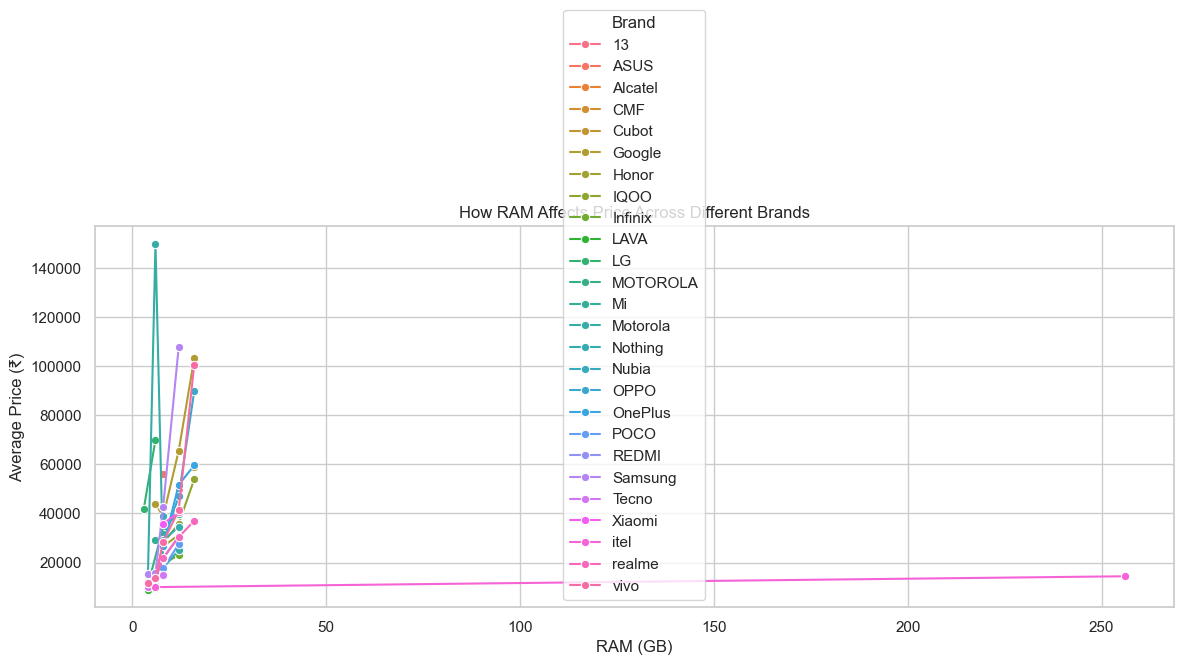

In [84]:

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=ram_price, x='RAM (GB)', y='Price', hue='Brand', marker='o')
plt.title('How RAM Affects Price Across Different Brands')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


**🧠 RAM vs Price across brands:**

* In most brands like **IQOO**, **vivo**, and **Google**, price **increases clearly** with more RAM.
* Some brands (like **Infinix** or **Alcatel**) offer **higher RAM at lower prices**, breaking the trend.
* **More RAM** generally means **higher price**, but **brand matters** a lot in pricing.

✅ So, RAM affects price, but not equally across all brands.



# Which brands offer phones with the largest batteries?


In [85]:
brand_battery = df.groupby('Brand')['Battery (mAh)'].mean().sort_values(ascending=False)

brand_battery.head()


Brand
Cubot     10200.000000
ASUS       6000.000000
IQOO       5928.771930
realme     5494.285714
OPPO       5474.905660
Name: Battery (mAh), dtype: float64


**🔋 Brand-wise battery size trends:**

* **Cubot** offers phones with the **largest batteries** (10,200 mAh).
* **ASUS** and **IQOO** also provide phones with **big batteries** around **6000 mAh**.
* **realme** and **OPPO** follow with slightly smaller but still strong battery capacities.

✅ So, **Cubot leads in battery size**, followed by **ASUS** and **IQOO**.


# Which brands offer best-rated phones in ₹10,000 – ₹15,000 range?


In [86]:
# Filter phones in ₹10,000 – ₹15,000 range
budget_df = df[(df['Price'] >= 10000) & (df['Price'] <= 15000)]

# Group by brand and calculate average rating
best_brands = budget_df.groupby('Brand')['Rating'].mean().sort_values(ascending=False)

# Show top brands
print("📊 Best-Rated Brands in ₹10,000 – ₹15,000 Range:")
print(best_brands)


📊 Best-Rated Brands in ₹10,000 – ₹15,000 Range:
Brand
OPPO             4.500000
OnePlus          4.400000
vivo             4.396000
realme           4.332653
IQOO             4.328571
Infinix          4.300000
REDMI            4.268966
Motorola         4.266667
Samsung          4.231818
POCO             4.230303
MOTOROLA         4.200000
Tecno            4.100000
itel             3.600000
(Refurbished)    2.400000
Name: Rating, dtype: float64




**💡 Best-rated brands in ₹10,000 – ₹15,000 range:**

* **OPPO** leads with the **highest average rating (4.5)**.
* **OnePlus**, **vivo**, and **realme** follow closely with strong ratings.
* Brands like **itel** and **refurbished phones** have **low user ratings**.

✅ So, for students or budget buyers, **OPPO**, **vivo**, and **realme** are safe and reliable choices.


In [87]:
# Keep only rows where 'Price' is greater than or equal to 5000
df = df[df['Price'] >= 5000]

# Drop all rows that contain 'NA' in any column
df = df[~df.isin(['NA']).any(axis=1)].reset_index(drop=True)

# Drop all rows that contain 'Not Available' in any column (corrected parentheses position)
df = df[~df.isin(['Not Available']).any(axis=1)].reset_index(drop=True)

df.dropna(inplace=True)


df.shape

(1072, 14)

In [88]:
df.isnull().sum()

Phone Name               0
Brand                    0
Color                    0
RAM (GB)                 0
ROM (GB)                 0
Display Type             0
Display Size (inches)    0
Battery (mAh)            0
Back Camera              0
Front Camera             0
Processor                0
Rating                   0
Discount                 0
Price                    0
dtype: int64

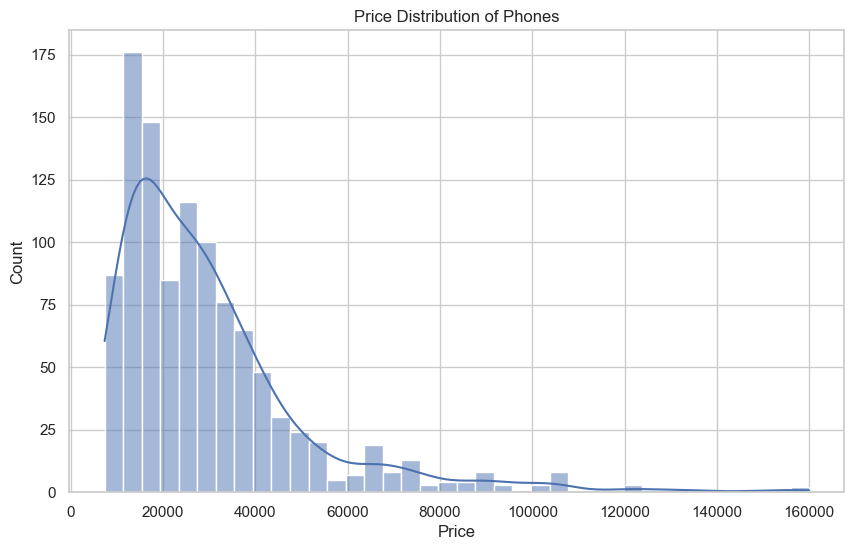

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean visuals
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))


sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution of Phones")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


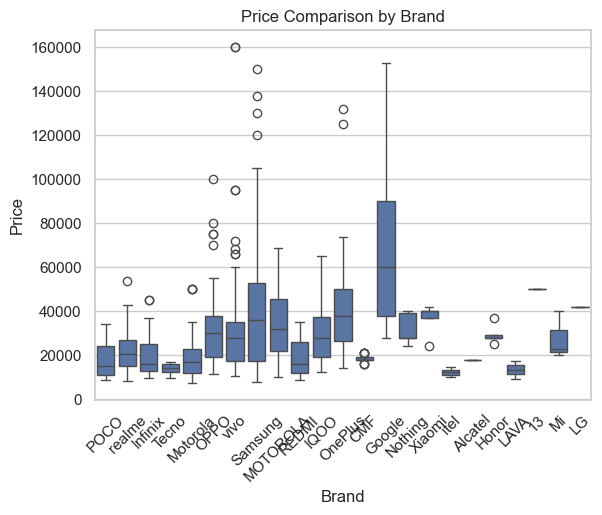

In [90]:
sns.boxplot(x=df['Brand'], y=df['Price'])
plt.title("Price Comparison by Brand")
plt.xticks(rotation=45)
plt.show()


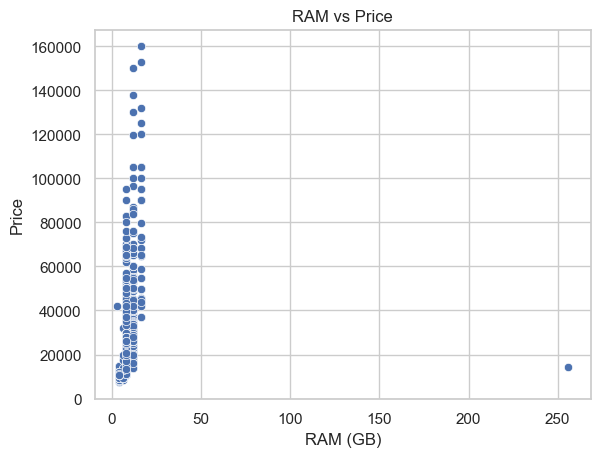

In [91]:
sns.scatterplot(x=df['RAM (GB)'], y=df['Price'])
plt.title("RAM vs Price")
plt.show()


In [92]:
df.to_csv('machine_learning_dataset.csv', index=False, encoding='utf-8')

In [93]:
data = pd.read_csv('machine_learning_dataset.csv')


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Phone Name             1072 non-null   object 
 1   Brand                  1072 non-null   object 
 2   Color                  1072 non-null   object 
 3   RAM (GB)               1072 non-null   float64
 4   ROM (GB)               1072 non-null   float64
 5   Display Type           1072 non-null   object 
 6   Display Size (inches)  1072 non-null   float64
 7   Battery (mAh)          1072 non-null   float64
 8   Back Camera            1072 non-null   object 
 9   Front Camera           1072 non-null   object 
 10  Processor              1072 non-null   object 
 11  Rating                 1072 non-null   float64
 12  Discount               1072 non-null   float64
 13  Price                  1072 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 117.4+ 

In [95]:
data.columns

Index(['Phone Name', 'Brand', 'Color', 'RAM (GB)', 'ROM (GB)', 'Display Type',
       'Display Size (inches)', 'Battery (mAh)', 'Back Camera', 'Front Camera',
       'Processor', 'Rating', 'Discount', 'Price'],
      dtype='object')

In [96]:
data['Brand'].unique()

array(['POCO', 'realme', 'Infinix', 'Tecno', 'Motorola', 'OPPO', 'vivo',
       'Samsung', 'MOTOROLA', 'REDMI', 'IQOO', 'OnePlus', 'CMF', 'Google',
       'Nothing', 'Xiaomi', 'itel', 'Alcatel', 'Honor', 'LAVA', '13',
       'Mi', 'LG'], dtype=object)

In [97]:
from sklearn.preprocessing import LabelEncoder 
# Drop unnecessary columns
data.drop(['Phone Name', 'Color'], axis=1, inplace=True)

# Apply Label Encoding on categorical columns
le = LabelEncoder()
data['Brand'] = le.fit_transform(df['Brand'])
data['Back Camera'] = le.fit_transform(df['Back Camera'])
data['Front Camera'] = le.fit_transform(df['Front Camera'])
data['Processor'] = le.fit_transform(df['Processor'])

# Apply One-Hot Encoding on 'Display Type' column
data = pd.get_dummies(df, columns=['Display Type'], dtype=int)


data

,Phone Name,Brand,Color,RAM (GB),ROM (GB),Display Size (inches),Battery (mAh),Back Camera,Front Camera,Processor,...,Display Type_Full HD,Display Type_Full HD+,Display Type_Full HD+ AMOLED,Display Type_Full HD+ E3 Super AMOLED,Display Type_Full HD+ Super AMOLED,Display Type_HD,Display Type_HD+,Display Type_Quad HD+,Display Type_Super HD,Display Type_WQHD
0,POCO M6 Plus 5G,POCO,Misty Lavender,6.0,128.0,6.79,5030.0,108MP + 2MP,13MP Front Camera,Snapdragon 4 Gen2 AE Processor,...,0,1,0,0,0,0,0,0,0,0
1,realme C63 5G Charger in the Box,realme,Forest Green,6.0,128.0,6.67,5000.0,32MP Rear Camera,8MP Front Camera,Dimensity 6300 Processor,...,0,0,0,0,0,0,1,0,0,0
2,Infinix Note 50x 5G+,Infinix,Sea Breeze Green,6.0,128.0,6.67,5500.0,50MP + AI Lens,8MP Front Camera,Dimensity 7300 Ultimate Processor,...,0,0,0,0,0,0,1,0,0,0
3,Infinix GT 30 Pro 5G+,Infinix,Blade White,12.0,256.0,6.78,5500.0,108MP + 8MP,13MP Front Camera,Dimensity 8350 Ultimate Processor,...,0,0,0,0,0,0,0,0,0,0
4,POCO M7 5G,POCO,Mint Green,8.0,128.0,6.88,5160.0,50MP Rear Camera,8MP Front Camera,4 Gen 2 5G Processor,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,vivo V30e,vivo,Silk Blue,8.0,128.0,6.78,5500.0,50MP + 8MP,50MP Front Camera,6 Gen 1 Processor,...,0,1,0,0,0,0,0,0,0,0
1287,vivo V29e 5G,vivo,Artistic Blue,8.0,256.0,6.78,5000.0,64MP + 8MP,50MP Front Camera,Snapdragon 695 Processor,...,0,1,0,0,0,0,0,0,0,0
1288,vivo V29e 5G,vivo,Artistic Red,8.0,128.0,6.78,5000.0,64MP + 8MP,50MP Front Camera,Snapdragon 695 Processor,...,0,1,0,0,0,0,0,0,0,0
1289,Nothing Phone,Nothing,2a) 5G (Blue,12.0,256.0,6.70,5000.0,50MP (OIS) + 50MP,32MP Front Camera,Dimensity 7200 Pro Processor,...,0,1,0,0,0,0,0,0,0,0
